# Basics of Logistic Regression

### Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

sns.set()

### Load the dataset

In [2]:
raw_data = pd.read_csv('./datasets/2.01. Admittance.csv')
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [5]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


### Variables

In [8]:
x1 = data['SAT']
y = data['Admitted']

### Let's plot the data

Text(0, 0.5, 'Admitted')

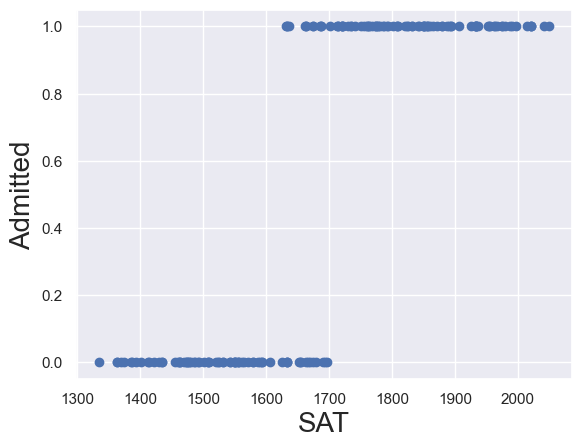

In [10]:
plt.scatter(x1,y, color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)

### Plot with a regression line

Text(0, 0.5, 'Admitted')

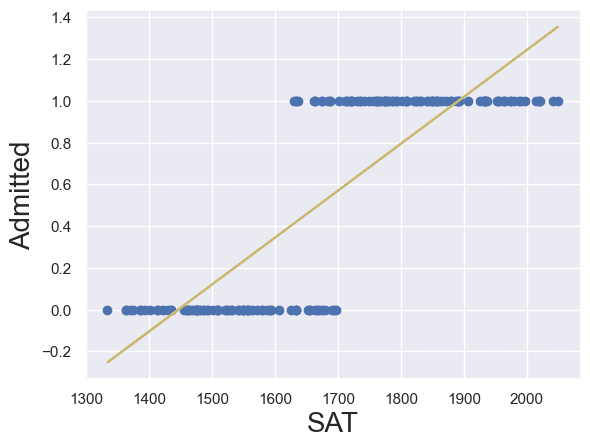

In [15]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()

plt.scatter(x1,y, color='C0')
y_hat = x1*results_lin.params.iloc[1] + results_lin.params.iloc[0]

plt.plot(x1,y_hat, color='C8')

plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)

In [16]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+b1*x1)/ (1 + np.exp(b0+b1*x1)))

f_sorted = np.sort(f(x1, results_log.params.iloc[0], results_log.params.iloc[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y, color='C0')
plt.plot(x_sorted,f_sorted, color='C8')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


AttributeError: 'LogitResults' object has no attribute 'iloc'